In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Return Forecasting: Read Historical Daily Yen Futures Data
In this notebook, you will load historical Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(Path("yen_draft-Copy1.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)
yen_futures.head()
#"C:\Users\Frank\Homework Folder\time_series.

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

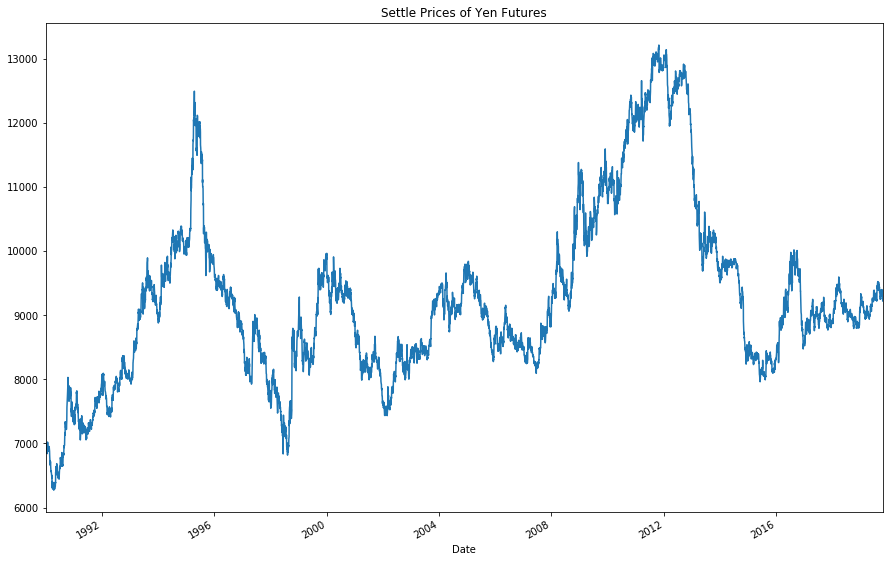

In [4]:
# Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE!
plot_title = "Settle Prices of Yen Futures"
yen_futures["Settle"].plot(legend=None, title=plot_title, figsize=(15, 10))

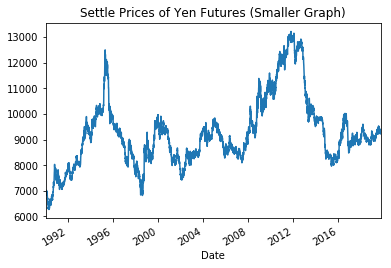

In [35]:
# Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE!
plot_title = "Settle Prices of Yen Futures (Smaller Graph)"
yen_futures["Settle"].plot(legend=None, title=plot_title)

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [45]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
# YOUR CODE HERE!
settle_noise, settle_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])
settle_trend.head(12)
#settler = settle_trend.to_frame()
#settler.head(12)

Date
1990-01-02    6908.503967
1990-01-03    6908.799756
1990-01-04    6909.057104
1990-01-05    6909.223948
1990-01-08    6909.310062
1990-01-09    6909.350704
1990-01-10    6909.412192
1990-01-11    6909.564371
1990-01-12    6909.863081
1990-01-15    6910.353807
1990-01-16    6911.058996
1990-01-17    6911.992749
Name: Settle_trend, dtype: float64

In [51]:
#settler = settle_trend.to_frame()
#settler.head(12)
settler = yen_futures["Settle"]
settler.head(12)
#settler["Settle"] = yen_futures["Settle"]
#settler.head(12)


Date
1990-01-02    6847.0
1990-01-03    6887.0
1990-01-04    7008.0
1990-01-05    6950.0
1990-01-08    6959.0
1990-01-09    6915.0
1990-01-10    6887.0
1990-01-11    6893.0
1990-01-12    6873.0
1990-01-15    6897.0
1990-01-16    6897.0
1990-01-17    6897.0
Name: Settle, dtype: float64

In [53]:
#settler["Settle"] = yen_futures["Settle"]
#settler.head(12)
settler['noise'] = settle_noise.to_frame()
settler.head(12)

Date
1990-01-02    6847
1990-01-03    6887
1990-01-04    7008
1990-01-05    6950
1990-01-08    6959
1990-01-09    6915
1990-01-10    6887
1990-01-11    6893
1990-01-12    6873
1990-01-15    6897
1990-01-16    6897
1990-01-17    6897
Name: Settle, dtype: object

In [48]:
#settler["Noise"] = settle_noise.to_frame()
#settler.head(12)

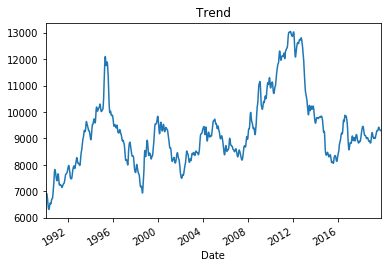

In [56]:
settle_trend.plot(title="Trend")

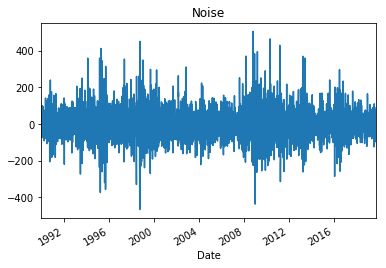

In [57]:
settle_noise.plot(title="Noise")

In [9]:
Noise = []
Trend = []
Noise.append(settle_noise)
Trend.append(settle_trend)
settle = pd.DataFrame(yen_futures['Settle'], {'settle_noise': 'Noise', 'settle_trend': 'Trend'})
settle.head()

,Settle
settle_noise,NaN
settle_trend,NaN


In [10]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
#---
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
# from https://stackoverflow.com/questions/30635145/create-multiple-dataframes-in-loop/30638956
#sampler = ['X_train', 'X_test', 'Y_train', 'Y_test']
# lagged return is x_train, y_train would be returns (upto 2017)
# x_test is after 2018, y_test is also after 2018
#X_train = train["lagged_return"]
#X_test = test["lagged_return"]
#Y_train = train["returns"]
#Y_test = test["returns"]
#---
settle = pd.DataFrame()
settle['Settle'] = yen_futures.Settle
settle['Noise'] = settle_noise
settle['Trend'] = settle_trend
settle.head()



,Settle,Noise,Trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062


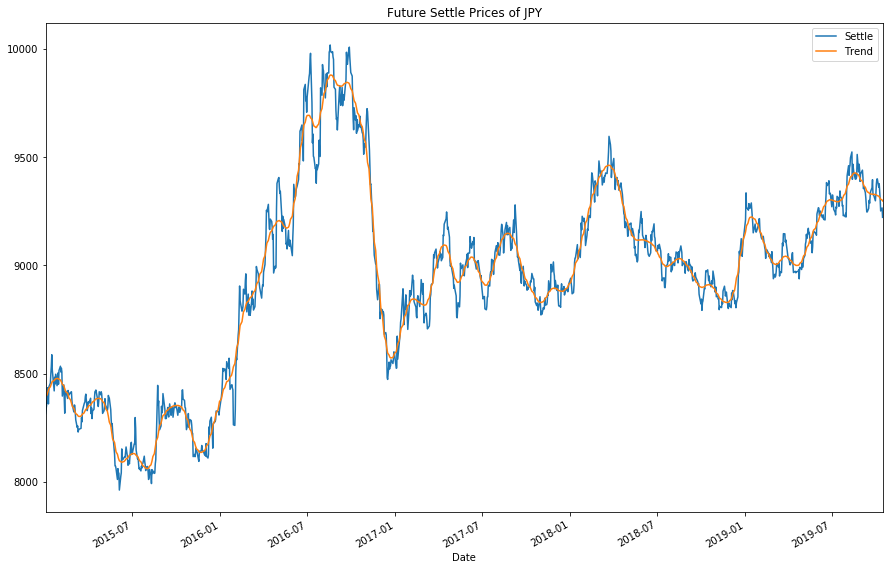

In [11]:
# Plot the Settle Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
settle[['Settle', 'Trend']].loc['2015':].plot(figsize=(15,10), title="Future Settle Prices of JPY")

In [12]:
# Plot the Settle Noise
# YOUR CODE HERE!
settle['Settle'].loc['2015':].head()

Date
2015-01-02    8315.0
2015-01-05    8371.0
2015-01-06    8435.0
2015-01-07    8412.0
2015-01-08    8360.0
Name: Settle, dtype: float64

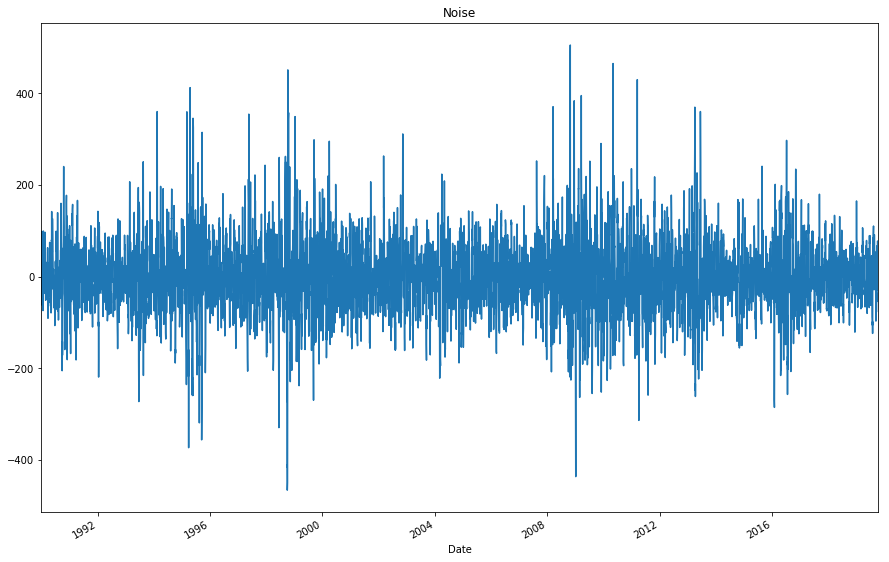

In [55]:
# Plot the Settle Noise
# YOUR CODE HERE!
settle_noise.plot(legend=None, figsize=(15,10), title="Noise")

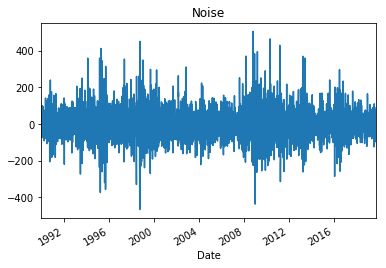

In [54]:
# Plot the Settle Noise
# YOUR CODE HERE!
settle_noise.plot(legend=None, title="Noise")
#yen_futures["Settle"].plot(legend=None, title=plot_title)
#figsize=(15,10)

In [13]:
settle.Trend.loc['2015':].head()

Date
2015-01-02    8394.686404
2015-01-05    8401.395762
2015-01-06    8408.585597
2015-01-07    8416.089059
2015-01-08    8423.755805
Name: Trend, dtype: float64

In [14]:
a = settle.loc['2015':]
a = a.drop(columns=['Noise'])
a.head(12)

,Settle,Trend
Date,,
2015-01-02,8315.0,8394.686404
2015-01-05,8371.0,8401.395762
2015-01-06,8435.0,8408.585597
2015-01-07,8412.0,8416.089059
2015-01-08,8360.0,8423.755805
2015-01-09,8439.0,8431.432940
2015-01-12,8456.0,8438.927718
2015-01-13,8500.0,8446.052125
2015-01-14,8533.0,8452.628816


---

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [15]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [16]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
model = ARMA(returns.values, order=(2,1))


# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
results = model.fit()

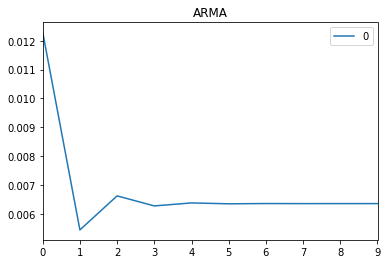

In [17]:
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="ARMA")

In [18]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()
# # the P > |z| values are all much bigger than .05, so that means the model does not fit the data


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Mon, 31 Aug 2020   AIC                          15798.142
Time:                        20:58:26   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.y       -0.3063      1.277     -0.240      0.810      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2947      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3344           +0.0000j            3.3344            0.5000
AR.2         -157.1779           +0.0000j          157.1779            0.5000
MA.1           -3.3933           +0.0000j            3.3933            0.5000
-----------------------------------------------------------------------------
"""

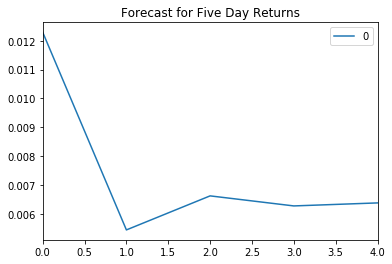

In [19]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Forecast for Five Day Returns")

pd.DataFrame(result.forecast(steps=5)[0]).plot(title="Forecast for Five Day Returns")

---

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [20]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model_alpha = ARIMA(yen_futures['Settle'], order=(5, 1, 1))
# Fit the model
# YOUR CODE HERE!

C:\Users\Frank\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Frank\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [21]:
results_alpha = model_alpha.fit()

In [22]:
# Output model summary results:
results_alpha.summary()
# the P > |z| values are all much bigger than .05, so that means the model does not fit the data

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Mon, 31 Aug 2020   AIC                          83905.238
Time:                        20:58:38   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3163      0.700      0.452      0.651      -1.056       1.688
ar.L1.D.Settle     0.2825      0.699      0.404      0.686      -1.087       1.652
ar.L2.D.Settle     0.0007      0.016      0.043      0.965      -0.030       0.032
ar.L3.D.Settle    -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0011      0.018     -0.064      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2975      0.699     -0.426      0.670      -1.667       1.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8921           -1.3783j            2.3409           -0.1002
AR.2            1.8921           +1.3783j            2.3409            0.1002
AR.3           -2.2717           -3.0196j            3.7787           -0.3527
AR.4           -2.2717           +3.0196j            3.7787            0.3527
AR.5          -11.1256           -0.0000j           11.1256           -0.5000
MA.1            3.3611           +0.0000j            3.3611            0.0000
-----------------------------------------------------------------------------
"""

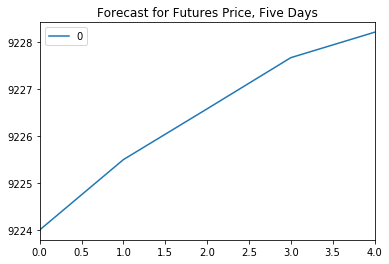

In [23]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
# Is this right?
pd.DataFrame(results_alpha.forecast(steps=5)[0]).plot(title="Forecast for Futures Price, Five Days")

pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Forecast for Futures Price, Five Days")

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [24]:
import arch 
from arch import arch_model

In [25]:
# Estimate a GARCH model:
# YOUR CODE HERE!
model_grouch = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
# Fit the model
results_grouch = model_grouch.fit(disp="off")
# YOUR CODE HERE!

In [26]:
# Summarize the model results
# YOUR CODE HERE!
results_grouch.summary()

# omega is constant, alpha one is lag one alpha two is lag two, beta one is lag one
# P > |z| less tan .05 means volatility, is in can state that there is predictabliity bw days...

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Mon, Aug 31 2020   Df Residuals:                     7510
Time:                        20:58:51   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

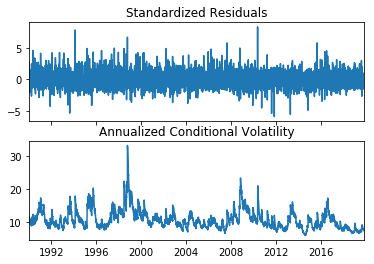

In [27]:
figure = results_grouch.plot(annualize='D')

In [28]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [29]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
#forecasts = res.forecast(start='2009-12-31', horizon=forecast_horizon)
#forecasts
forecasts = results_grouch.forecast(start='2019-10-15', horizon=forecast_horizon)
forecasts

In [30]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [31]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15 00:00:00
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


In [32]:
# Plot the final forecast
# YOUR CODE HERE!
final = intermediate.dropna().T
final


Date,2019-10-15 00:00:00
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


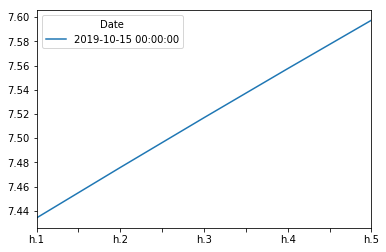

In [33]:
final.plot()

---

# Conclusions

Based on your time series analysis, would you buy the yen now?

Is the risk of the yen expected to increase or decrease?

Based on the model evaluation, would you feel confident in using these models for trading?

##### Based on your time series analysis, would you buy the yen now?

##### Leveraging the possible increase in reliability over time (ARMA graph), the possible increase in price of the Yen future (ARIMA graph), and the increase in volatility (GARCH graph), the student-author (me, Franklin Bueno) would purchase the yen now.

##### Is the risk of the yen expected to increase or decrease?

##### Based on the final plot (the GARCH graph), one could state that volatility may increase over the given time frame. Increased volatility and increased risk follow each other. From the GARCH graph, one could state that the risk of the yen may increase.

##### Does this model perform better or worse on out-of-sample data compared to in-sample data?

##### The homework readme file stated that "Out-of-sample data is data that the model hasn't seen before (Testing Data)." Also, the homework readme file stated that "In-sample data is data that the model was trained on (Training Data)." This regression model is exactly like the example that Instructor GS gave in class. Just like that class example, the root mean squared error of the out-of-sample was less than the root mean squared error of the in-sample. In this case, the in-sample RMSE is 0.5963660785073426. For the out-of-sample, the RMSE is 0.4154832784856737. The model may fit better with the data that the model "hadn't seen before" instead of the data on which the model was trained. It was stated in class that this situation is rare, ideal, and more desirable than the case in which the model fits better with the data upon which the model was composed instead of the data on which the model had not been used.